In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Data/train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


For classification problems there is no need for normalize and min max scalar the numerical variables. Either way we will try both approaches. 

In [4]:
df_num = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
y = 'Exited'
df_cat= ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

# EDA

## Data Quality

In [5]:
null_values = df.isnull().sum()

for column, count in null_values.items():
    print(f"Column '{column}': {count} null values")

Column 'id': 0 null values
Column 'CustomerId': 0 null values
Column 'Surname': 0 null values
Column 'CreditScore': 0 null values
Column 'Geography': 0 null values
Column 'Gender': 0 null values
Column 'Age': 0 null values
Column 'Tenure': 0 null values
Column 'Balance': 0 null values
Column 'NumOfProducts': 0 null values
Column 'HasCrCard': 0 null values
Column 'IsActiveMember': 0 null values
Column 'EstimatedSalary': 0 null values
Column 'Exited': 0 null values


No Null Values

In [6]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print out the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


No duplicate rows

In [7]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Looking at the statistics of each column (Distribution, min, max, mean...).

## Univariate Analysis Numerical variables


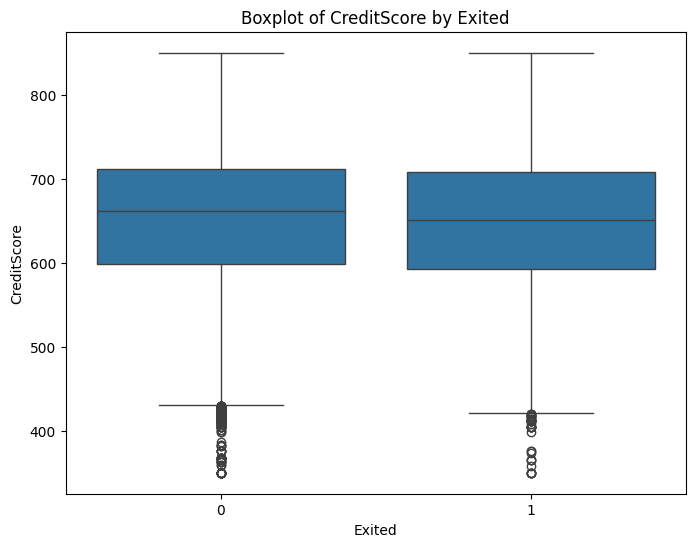

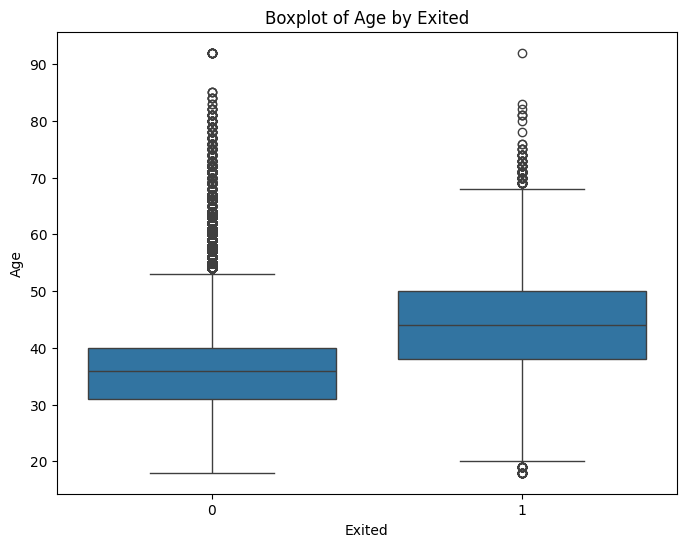

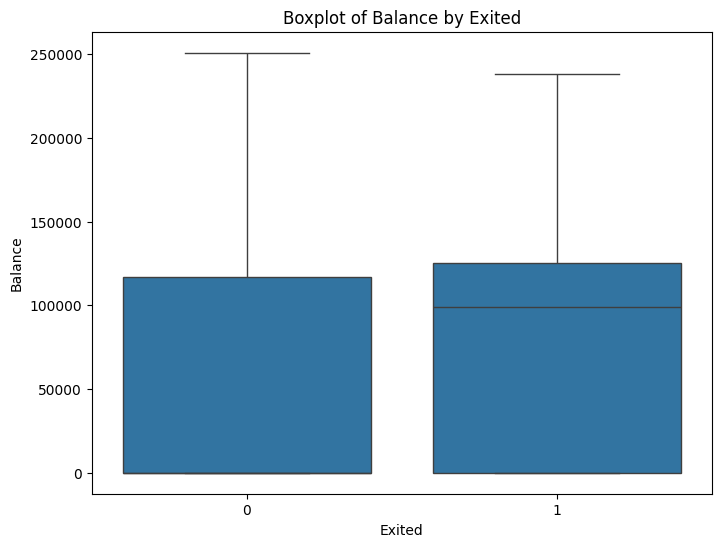

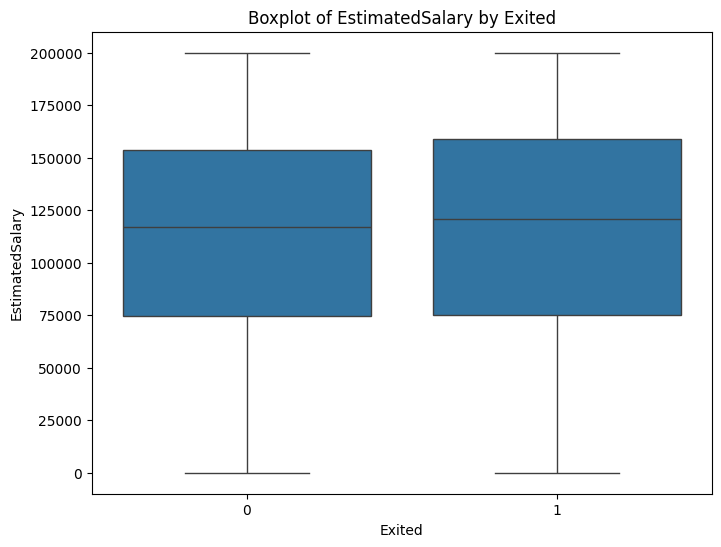

In [8]:
for column in df_num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y, y=column, data=df)
    plt.title(f'Boxplot of {column} by {y}')
    plt.show()

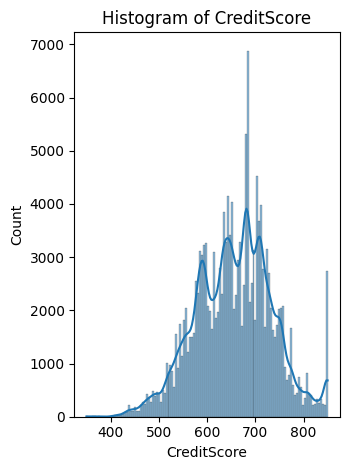

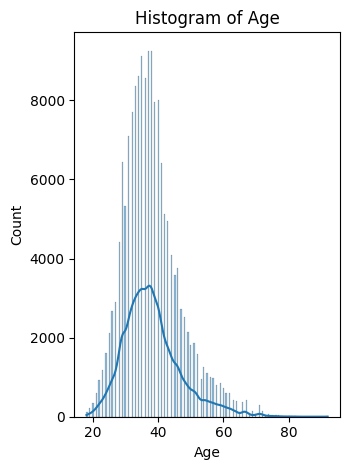

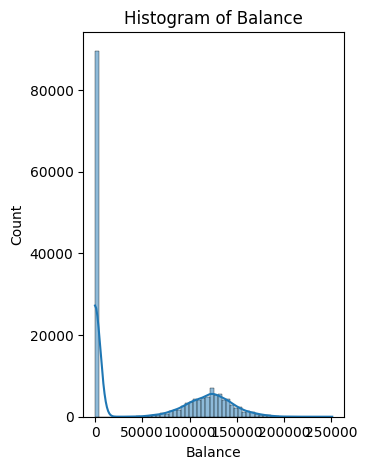

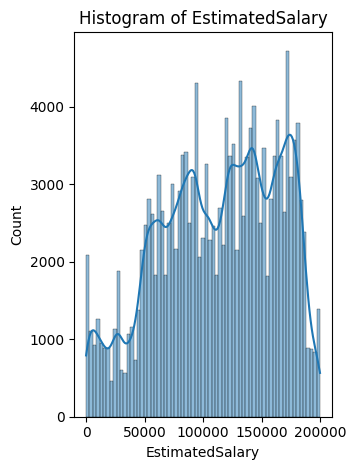

In [9]:
for column in df_num:    
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

## Bivariate Analysis Numerical variables

c:\Users\a914600\AppData\Local\anaconda3\envs\PenTestingAI\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


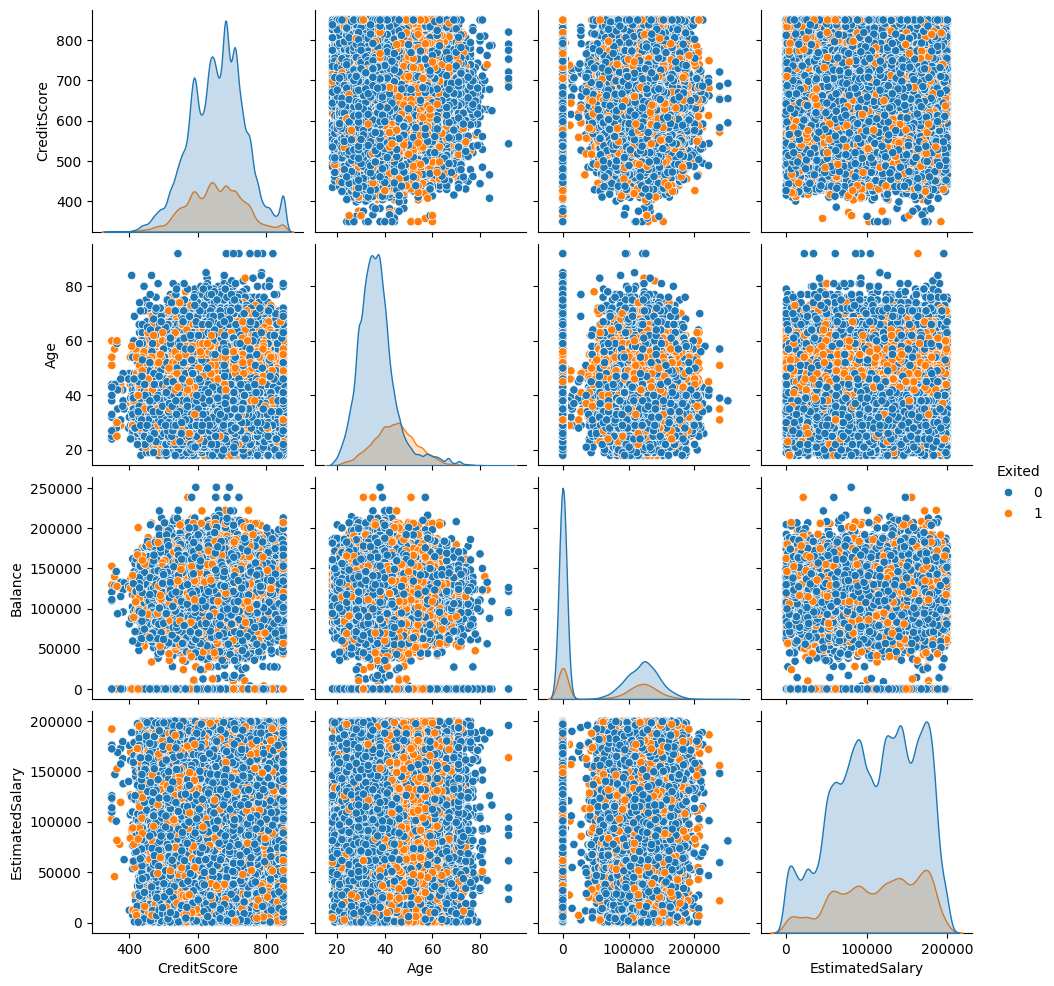

In [10]:
sns.pairplot(df[df_num + [y]], hue=y)
plt.show()

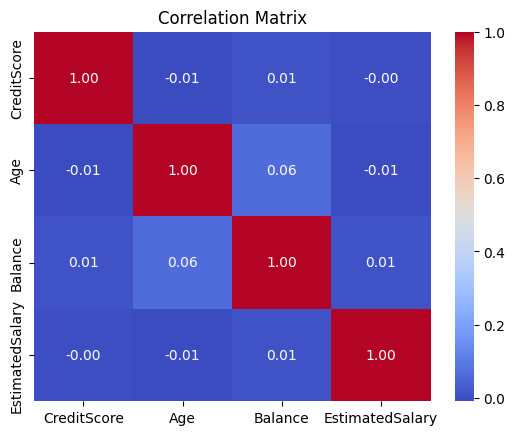

In [11]:
correlation_matrix = df[df_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

No multicollinearity

## Univariate Analysis Categorical variables

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


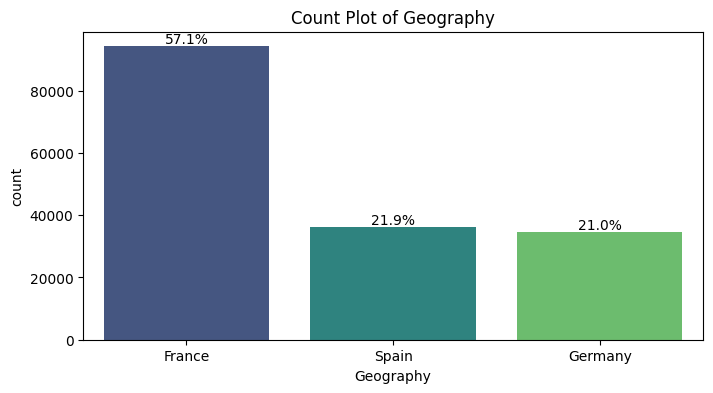

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


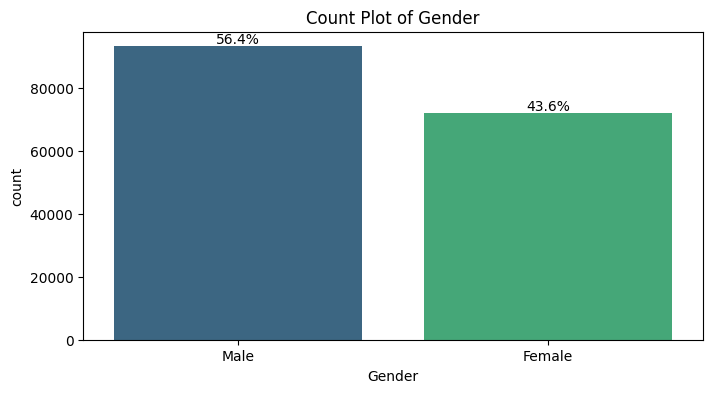

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


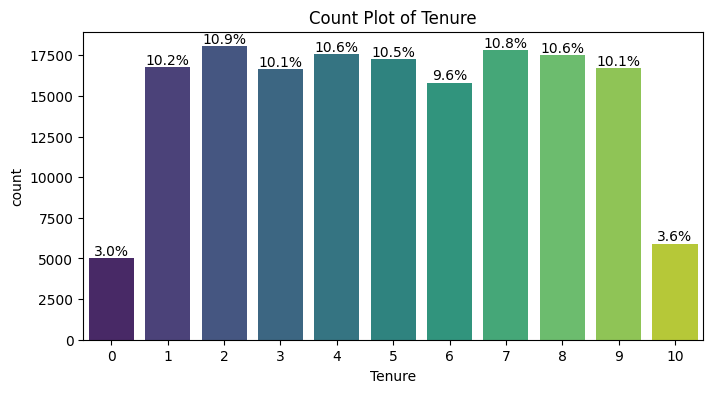

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


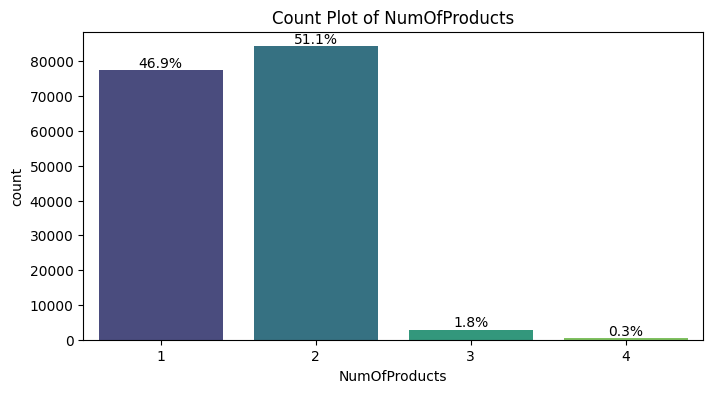

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


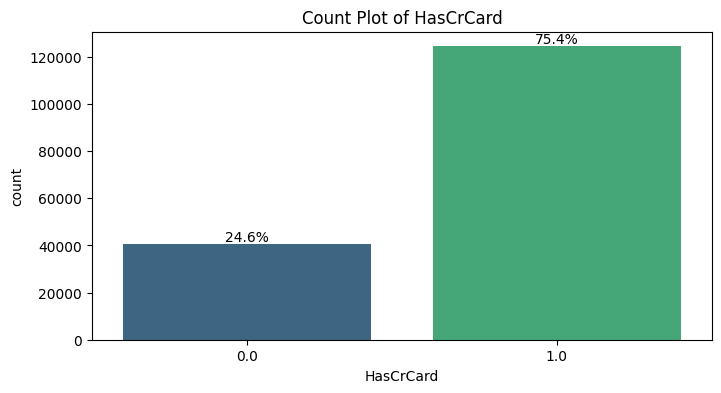

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\2366449258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='viridis')


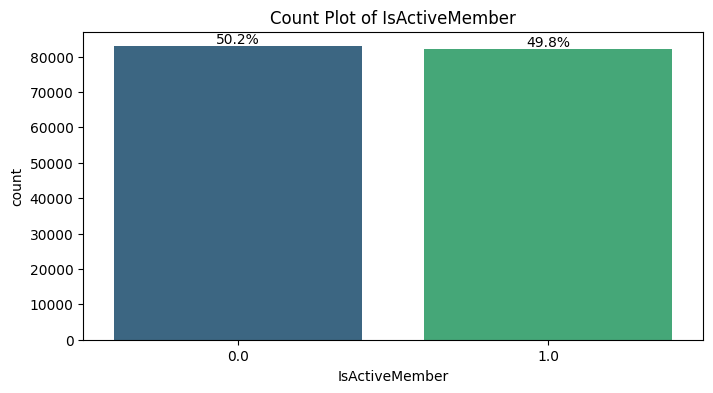

In [12]:

for column in df_cat:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')

    # Add percentage annotations on top of each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

    plt.show()


## Bivariate Analysis Categorical variables

<Figure size 800x400 with 0 Axes>

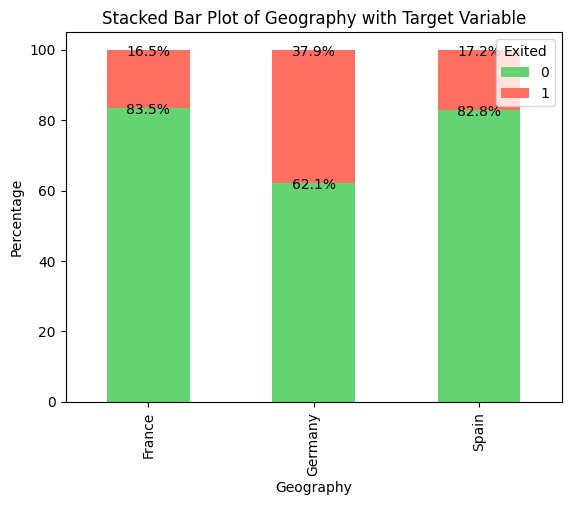

<Figure size 800x400 with 0 Axes>

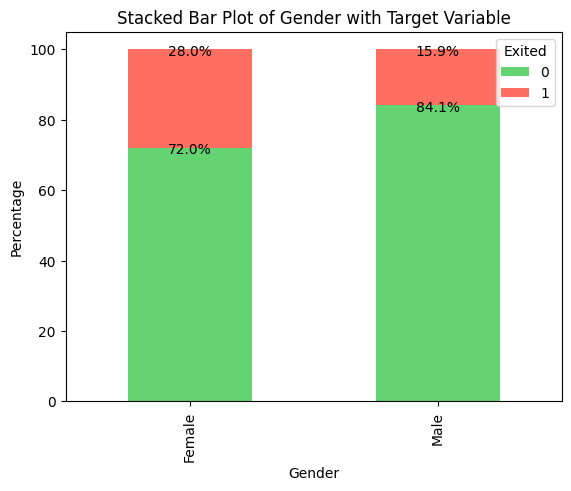

<Figure size 800x400 with 0 Axes>

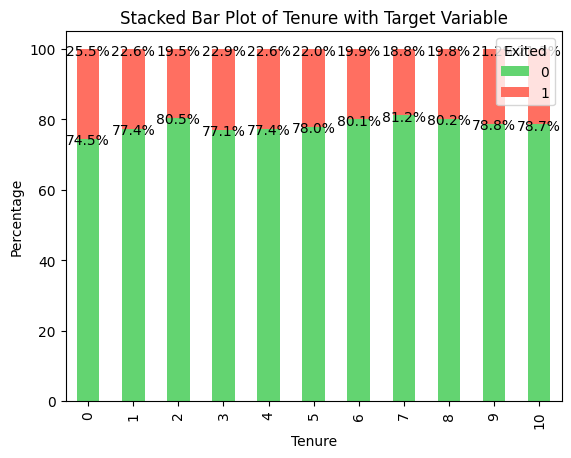

<Figure size 800x400 with 0 Axes>

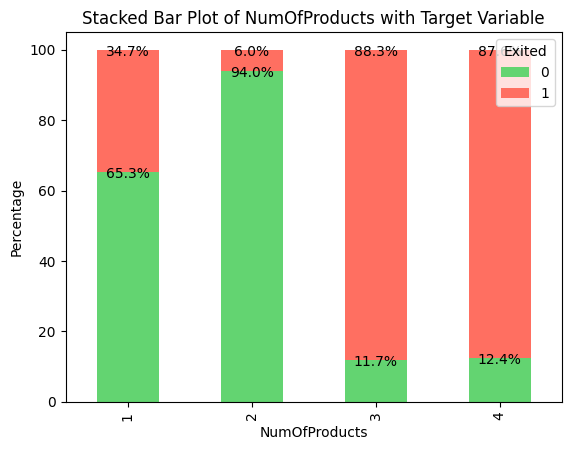

<Figure size 800x400 with 0 Axes>

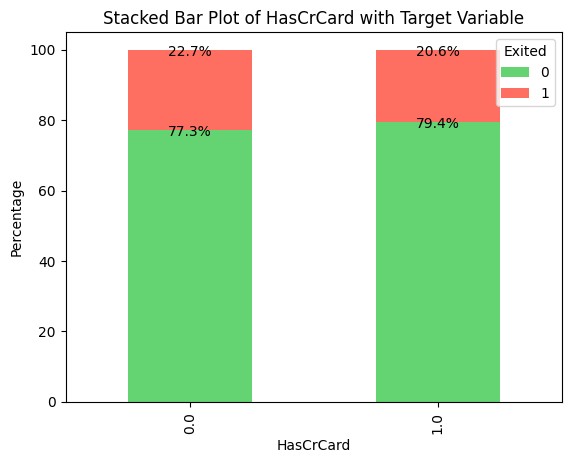

<Figure size 800x400 with 0 Axes>

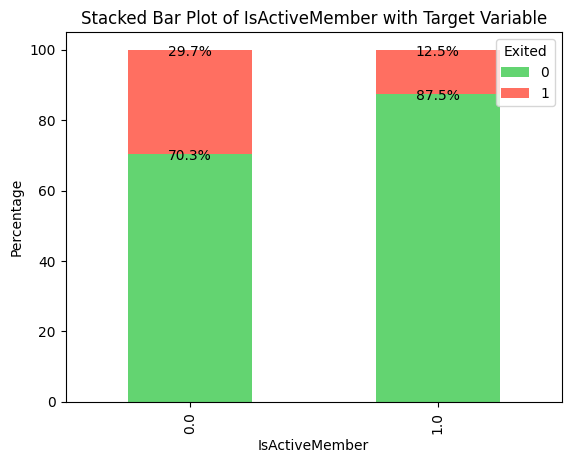

In [13]:
for column in df_cat:
    plt.figure(figsize=(8, 4))
    
    crosstab_result = pd.crosstab(df[column], df['Exited'])
    stacked_data = crosstab_result.apply(lambda r: r/r.sum() * 100, axis=1)

    stacked_data.plot(kind='bar', stacked=True, color=['#63D471', '#FF6F61'])
    
    plt.title(f'Stacked Bar Plot of {column} with Target Variable')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend(title='Exited', loc='upper right', labels=['0', '1'])
    
    for i in range(len(stacked_data)):
        total = stacked_data.iloc[i].sum()
        for j in range(len(stacked_data.columns)):
            plt.text(i, stacked_data.iloc[i, :j+1].sum() - 0.5, f'{stacked_data.iloc[i, j]:.1f}%', ha='center', va='center', color='black')
    
    plt.show()



# Preprocessing of data

In [14]:
#Mapping the genders
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [15]:
# Create dummy variables for 'Geography' because if it has more than category.
geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography').astype(int)
df = pd.concat([df, geography_dummies], axis=1)
df = df.drop('Geography', axis=1)

In [16]:
print(df.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [17]:
df.head()

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,15674932,Okwudilichukwu,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,1,15749177,Okwudiliolisa,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,2,15694510,Hsueh,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,3,15741417,Kao,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,4,15766172,Chiemenam,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1


Text(0.5, 1.0, 'Correlation Plot')

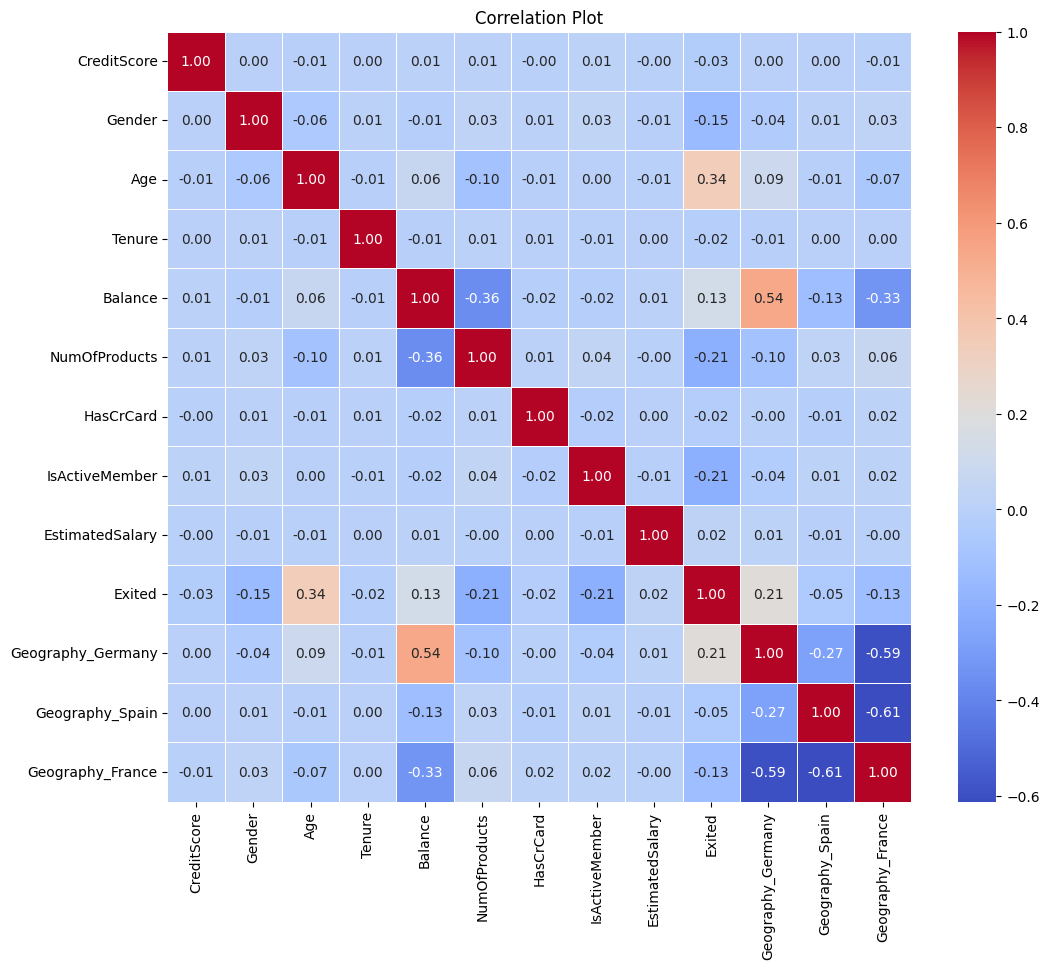

In [18]:
selected_columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                    'Exited', 'Geography_Germany', 'Geography_Spain','Geography_France']

selected_df = df[selected_columns]

correlation_matrix = selected_df.corr()

# Create a correlation plot using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Plot")

Checking again for multicollinearity, none found

C:\Users\a914600\AppData\Local\Temp\ipykernel_20808\3713106683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


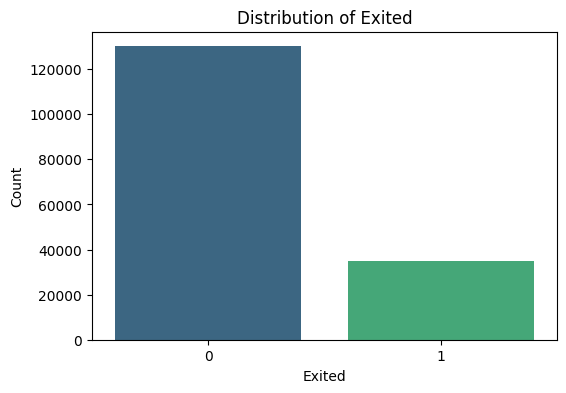

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

Unbalance data, will have to balance the train test. First approach will be undersampling as we have enough data points, second approach oversampling. 

In [20]:
df.to_csv('df.csv', index=False)